# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# ML packages
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# Read in Data

In [2]:
# Set working directory
%cd C:/Users/sriha/OneDrive/Desktop/DS/My work/life-expectancy
    
# Unpickle engineered train data
X_train = pd.read_pickle('Data/X_train_engineered.pkl')

# Unpickle engineered test data
X_test = pd.read_pickle('Data/X_test_engineered.pkl')

# Import target variables
y_train = pd.read_pickle('Data/y_train.pkl')
y_test = pd.read_pickle('Data/y_test.pkl')

C:\Users\sriha\OneDrive\Desktop\DS\My work\life-expectancy


In [3]:
display(X_train.head())
display(X_test.head())

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,under-five deaths,Polio,Total expenditure,...,Country_dummy_United States of America,Country_dummy_Uruguay,Country_dummy_Uzbekistan,Country_dummy_Vanuatu,Country_dummy_Venezuela (Bolivarian Republic of),Country_dummy_Viet Nam,Country_dummy_Yemen,Country_dummy_Zambia,Country_dummy_Zimbabwe,Status_Developing
615,2008,5.826000,2.197225,2.58,0.000000,4.304065,1.098612,2.484907,4.356709,2.90,...,0,0,0,0,0,0,0,0,0,1
2909,2012,5.857933,3.401197,2.59,5.287839,4.369448,6.799056,3.784190,2.079442,4.91,...,0,0,0,0,0,0,0,1,0,1
2812,2013,4.770685,0.693147,5.82,6.181680,4.553877,0.000000,0.693147,4.553877,8.68,...,0,1,0,0,0,0,0,0,0,1
1825,2003,3.135494,3.663562,0.20,1.332621,1.098612,9.498897,3.931826,4.343805,5.48,...,0,0,0,0,0,0,0,0,0,1
497,2014,4.189655,1.098612,8.10,4.636574,4.025352,6.037871,1.098612,4.521789,1.45,...,0,0,0,0,0,0,0,0,0,1


,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,under-five deaths,Polio,Total expenditure,...,Country_dummy_United States of America,Country_dummy_Uruguay,Country_dummy_Uzbekistan,Country_dummy_Vanuatu,Country_dummy_Venezuela (Bolivarian Republic of),Country_dummy_Viet Nam,Country_dummy_Yemen,Country_dummy_Zambia,Country_dummy_Zimbabwe,Status_Developing
1831,2013,1.945910,0.693147,8.68,7.297112,3.951244,7.875879,0.693147,4.584967,11.40,...,0,0,0,0,0,0,0,0,0,0
893,2004,5.872118,5.384495,0.86,0.919072,4.269697,4.304065,5.837730,4.007333,4.23,...,0,0,0,0,0,0,0,0,0,1
1800,2011,5.594711,1.386294,7.84,2.185628,4.418841,4.382027,1.609438,4.454347,8.78,...,0,0,0,0,0,0,0,0,0,1
56,2007,5.929589,4.477337,6.35,5.224786,4.304065,6.922644,4.934474,4.330733,3.38,...,0,0,0,0,0,0,0,0,0,1
2860,2013,5.075174,2.302585,6.71,0.000000,4.418841,0.000000,2.397895,4.418841,4.94,...,0,0,0,0,1,0,0,0,0,1


# Train and Evaluate Models

Let's say we pick the linear regression model for our purposes. Now we train our model of choice on the entire training set, and make predictions on the test set. 

In [4]:
def evaluate_results(model, train_data, train_results, test_data, test_results):
    
    # Fit model
    model.fit(train_data, train_results)
    
    # Make predictions
    predictions = model.predict(test_data)
    
    # Evaluate results
    print("MSE Score:", format(mean_squared_error(test_results, predictions),'.3f'))
    print("R2 Score:", format(r2_score(y_test, predictions),'.3f'))
    
    # Visulaize results
    plt.figure(figsize=(8,5))
    plt.scatter(predictions,test_results)
    plt.title('Predicted vs. Real y', fontsize=14)
    plt.xlabel('Real y',fontsize=12)
    plt.ylabel('Predicted y',fontsize=12)

MSE Score: 4.161
R2 Score: 0.951


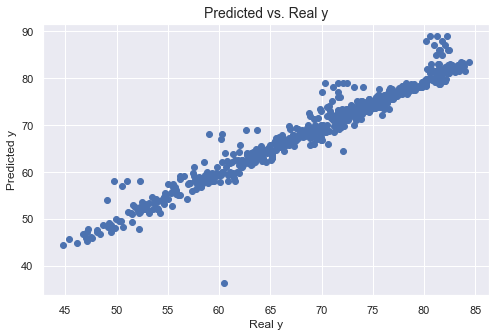

In [5]:
lm = LinearRegression()
evaluate_results(lm, X_train, y_train, X_test, y_test)

MSE Score: 4.161
R2 Score: 0.951


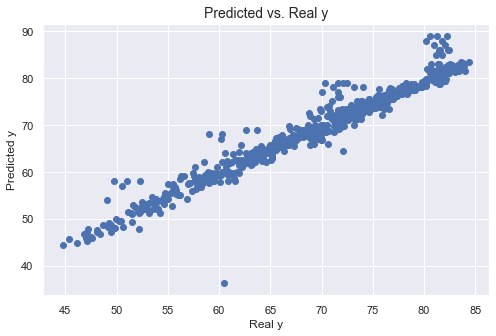

In [6]:
pipe = Pipeline([
    ('Scale', StandardScaler()), 
    ('lm', LinearRegression())
])

evaluate_results(pipe, X_train, y_train, X_test, y_test)

It appears that scaling doesn't seem to impact the results at all. This makses sense since scaling shouldn't affect the results of linear regression. If we were to use different models however, scaling would be an important metric. 

------------------------

# OPTIONAL

The following steps are optional, and are included to show how to evaluate multiple models for production purposes.

In many situations, we would evaluate multiple models with crosss validation, and hyperparameter tuning.

# Create ModelContainer Object

In [7]:
class ModelContainer():
    
    def __init__(self):
        self.models = {}
        self.mean_mse = {}
        self.std_mse = {}
        self.best_model = None
        self.kfolds = 0

        
    def add_model(self, model):
        '''
        Add multiple machine learning models to evaluate
        '''
        self.models[model[0]] = model[1]

        
    def get_results(self, X, y, kfolds=5):
        '''
        Use cross validation to evaluate all the selected models
        '''
        for model_name, model in self.models.items():
            neg_mse = cross_val_score(model, X, y, cv=kfolds, scoring='neg_mean_squared_error')
            self.mean_mse[model_name] = -1.0*np.mean(neg_mse)
            self.std_mse[model_name] = np.std(neg_mse)
            self.kfolds = kfolds
            print(model_name, 'cross-validated.')


    def print_summary(self):
        print('\nModel Summaries:')
        for model_name, model in self.models.items():
            print(model_name, ':')
            print('Mean MSE over', self.kfolds.n_splits, 'folds:',  self.mean_mse[model_name], '+/-', self.std_mse[model_name],'\n')

# Create Baseline Model

In [8]:
baseline_model = ModelContainer()
baseline_model.add_model(('Linear Regression', LinearRegression()))

kf = KFold(n_splits=10)

baseline_model.get_results(X_train, y_train, kfolds=kf)

baseline_model.print_summary()

Linear Regression cross-validated.

Model Summaries:
Linear Regression :
Mean MSE over 10 folds: 3.7622332361413298 +/- 0.616861334424227 



# Hyperparameter Tuning

In [9]:
def tune_hyperparameters(training_data, training_targets, model, param_grid):

  random_search = RandomizedSearchCV(
      model,
      param_distributions=param_grid,
      scoring='neg_mean_squared_error',
      n_jobs=-1,
      n_iter=20,
      cv=10)

  random_search.fit(np.array(training_data), np.array(training_targets))
  print('Best hyperparameters for', model, 'are:')
  print(random_search.best_params_)
  print('\n')

In [10]:
param_ridge = {'alpha':np.arange(1, 1000, 1)}

In [11]:
tune_hyperparameters(X_train, y_train, Ridge(), param_ridge)

Best hyperparameters for Ridge() are:
{'alpha': 41}




# Retrain Tuned Models

In [12]:
tuned_models = ModelContainer()
tuned_models.add_model(('Linear Regression', LinearRegression()))
tuned_models.add_model(('Ridge Regression', Ridge(alpha=41)))

tuned_models.get_results(X_train, y_train, kfolds=kf)
tuned_models.print_summary()

Linear Regression cross-validated.
Ridge Regression cross-validated.

Model Summaries:
Linear Regression :
Mean MSE over 10 folds: 3.7622332361413298 +/- 0.616861334424227 

Ridge Regression :
Mean MSE over 10 folds: 11.544609832393261 +/- 1.6054147104919558 



The above is an example of how to evaluate multiple models before making the final prediction. We can choose the ML algorithm that works best and use it to create our final model for deployment as well as evaluate results on the 'unseen' test set. 